In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

import os

C:\Users\acorn\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [44]:
# # 파일 확장자 수정 pizza, Burger jpeg-> jpg
# import sys
# from os import rename, listdir

# PATH = 'C:\\Users\\acorn\\Desktop\\SG\\FP\\food img\\0'

# file_list = listdir(PATH)

# for name in file_list:
#     replaced = name.replace("png","jpg")
#     rename(PATH+'\\'+name, PATH+'\\'+replaced)
#     print(name,' -> ',replaced)

# print('변환 완료')

Burger-Train (1).png  ->  Burger-Train (1).jpg
Burger-Train (10).jpg  ->  Burger-Train (10).jpg
Burger-Train (100).jpg  ->  Burger-Train (100).jpg
Burger-Train (1000).jpg  ->  Burger-Train (1000).jpg
Burger-Train (1001).jpg  ->  Burger-Train (1001).jpg
Burger-Train (1002).jpg  ->  Burger-Train (1002).jpg
Burger-Train (1003).jpg  ->  Burger-Train (1003).jpg
Burger-Train (1004).jpg  ->  Burger-Train (1004).jpg
Burger-Train (1005).jpg  ->  Burger-Train (1005).jpg
Burger-Train (1006).jpg  ->  Burger-Train (1006).jpg
Burger-Train (1007).jpg  ->  Burger-Train (1007).jpg
Burger-Train (1008).jpg  ->  Burger-Train (1008).jpg
Burger-Train (1009).jpg  ->  Burger-Train (1009).jpg
Burger-Train (101).jpg  ->  Burger-Train (101).jpg
Burger-Train (1010).jpg  ->  Burger-Train (1010).jpg
Burger-Train (1011).jpg  ->  Burger-Train (1011).jpg
Burger-Train (1012).jpg  ->  Burger-Train (1012).jpg
Burger-Train (1013).jpg  ->  Burger-Train (1013).jpg
Burger-Train (1014).jpg  ->  Burger-Train (1014).jpg
Burger-

Burger-Train (1390).jpg  ->  Burger-Train (1390).jpg
Burger-Train (1391).jpg  ->  Burger-Train (1391).jpg
Burger-Train (1392).jpg  ->  Burger-Train (1392).jpg
Burger-Train (1393).jpg  ->  Burger-Train (1393).jpg
Burger-Train (1394).jpg  ->  Burger-Train (1394).jpg
Burger-Train (1395).jpg  ->  Burger-Train (1395).jpg
Burger-Train (1396).jpg  ->  Burger-Train (1396).jpg
Burger-Train (1397).jpg  ->  Burger-Train (1397).jpg
Burger-Train (1398).jpg  ->  Burger-Train (1398).jpg
Burger-Train (1399).jpg  ->  Burger-Train (1399).jpg
Burger-Train (14).jpg  ->  Burger-Train (14).jpg
Burger-Train (140).jpg  ->  Burger-Train (140).jpg
Burger-Train (1400).jpg  ->  Burger-Train (1400).jpg
Burger-Train (1401).jpg  ->  Burger-Train (1401).jpg
Burger-Train (1402).jpg  ->  Burger-Train (1402).jpg
Burger-Train (1403).jpg  ->  Burger-Train (1403).jpg
Burger-Train (1404).jpg  ->  Burger-Train (1404).jpg
Burger-Train (1405).jpg  ->  Burger-Train (1405).jpg
Burger-Train (1406).jpg  ->  Burger-Train (1406).jpg

Burger-Train (447).jpg  ->  Burger-Train (447).jpg
Burger-Train (448).jpg  ->  Burger-Train (448).jpg
Burger-Train (449).jpg  ->  Burger-Train (449).jpg
Burger-Train (45).jpg  ->  Burger-Train (45).jpg
Burger-Train (450).jpg  ->  Burger-Train (450).jpg
Burger-Train (451).jpg  ->  Burger-Train (451).jpg
Burger-Train (452).jpg  ->  Burger-Train (452).jpg
Burger-Train (453).jpg  ->  Burger-Train (453).jpg
Burger-Train (454).jpg  ->  Burger-Train (454).jpg
Burger-Train (455).jpg  ->  Burger-Train (455).jpg
Burger-Train (456).jpg  ->  Burger-Train (456).jpg
Burger-Train (457).jpg  ->  Burger-Train (457).jpg
Burger-Train (458).jpg  ->  Burger-Train (458).jpg
Burger-Train (459).jpg  ->  Burger-Train (459).jpg
Burger-Train (46).jpg  ->  Burger-Train (46).jpg
Burger-Train (460).jpg  ->  Burger-Train (460).jpg
Burger-Train (461).jpg  ->  Burger-Train (461).jpg
Burger-Train (462).jpg  ->  Burger-Train (462).jpg
Burger-Train (463).jpg  ->  Burger-Train (463).jpg
Burger-Train (464).jpg  ->  Burger-

Burger-Train (870).jpg  ->  Burger-Train (870).jpg
Burger-Train (871).jpg  ->  Burger-Train (871).jpg
Burger-Train (872).jpg  ->  Burger-Train (872).jpg
Burger-Train (873).jpg  ->  Burger-Train (873).jpg
Burger-Train (874).jpg  ->  Burger-Train (874).jpg
Burger-Train (875).jpg  ->  Burger-Train (875).jpg
Burger-Train (876).jpg  ->  Burger-Train (876).jpg
Burger-Train (877).jpg  ->  Burger-Train (877).jpg
Burger-Train (878).jpg  ->  Burger-Train (878).jpg
Burger-Train (879).jpg  ->  Burger-Train (879).jpg
Burger-Train (88).jpg  ->  Burger-Train (88).jpg
Burger-Train (880).jpg  ->  Burger-Train (880).jpg
Burger-Train (881).jpg  ->  Burger-Train (881).jpg
Burger-Train (882).jpg  ->  Burger-Train (882).jpg
Burger-Train (883).jpg  ->  Burger-Train (883).jpg
Burger-Train (884).jpg  ->  Burger-Train (884).jpg
Burger-Train (885).jpg  ->  Burger-Train (885).jpg
Burger-Train (886).jpg  ->  Burger-Train (886).jpg
Burger-Train (887).jpg  ->  Burger-Train (887).jpg
Burger-Train (888).jpg  ->  Burge

In [13]:
# DATA ROOT DIR 설정
DATA_ROOT_DIR = os.path.join('C:\\Users\\acorn\\Desktop\\SG\\FP\\food img\\') 
label_name_list = os.listdir(DATA_ROOT_DIR)

In [69]:
import glob
import cv2

image_list=[]
label_list=[]

# 경로 지정
for label_name in label_name_list:
    file_path = os.path.join(DATA_ROOT_DIR, label_name)
    img_file_list=glob.glob(file_path + "/*.jpg")
    
    # 폴더 별로 반복문 돌리기
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR) # 컬러이미지로 가져오기
        src_img = cv2.resize(src_img, dsize=(128,128)) # 사이즈 조절
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB) # BGR 에서 RGB로 변환
        
        image_list.append(src_img) # X값
        label_list.append(float(label_name)) # Y값

In [70]:
# list에 담겼는지 확인
print(len(image_list),len(label_list))

8274 8274


In [71]:
X_train, X_test, y_train, y_test =train_test_split(np.array(image_list),
                                                   np.array(label_list),
                                                   test_size=0.2)

In [72]:
# shape확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6619, 128, 128, 3) (1655, 128, 128, 3) (6619,) (1655,)


In [73]:
# 정규화
X_train= X_train.astype(np.float32) /255.0
X_test= X_test.astype(np.float32) /255.0

In [74]:
# 모델 설계

model = Sequential()


model.add(Conv2D(input_shape=(128,128,3), kernel_size=3,
                 filters=32,strides=(1,1), padding="SAME", activation="relu"))

# 1sf conv layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(kernel_size=3,filters=64,
                 strides=(1,1), padding="SAME", activation="relu"))

# 2nd conv layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(kernel_size=3,filters=128,
                 strides=(1,1), padding="SAME", activation="relu"))

# 3rd conv layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(kernel_size=3,filters=256,
                 strides=(1,1), padding="SAME", activation="relu"))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))


model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [75]:
# 모델 summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 128)     

In [76]:
# 시간 측정
from datetime import datetime

start_time = datetime.now()
result= model.fit(X_train, y_train, epochs=50, validation_split=0.2 ,batch_size=32)
end_time = datetime.now()

print("\n걸린 시간 : ",end_time - start_time)

Epoch 1/50
 95/166 [================>.............] - ETA: 25s - loss: 1.8304 - accuracy: 0.1832

KeyboardInterrupt: 

In [65]:
# evaluate
model.evaluate(X_test, y_test)

52/52 [==============================] - 0s 9ms/step - loss: 2.5267 - accuracy: 0.6544


[2.526712417602539, 0.6543806791305542]

### result C/ MC/ MC/ F / D=128 /DR=0.5/ D=128
#### epoch = 30, batch_size=32 , optimizer=Adam(learning_rate=0.001), loss=sparse_categorical_crossentropy

- fit: loss: 0.1440, accuracy: 0.9479, val_loss: 1.9869, val_accuracy: 0.6647
- evaluate : loss: 2.0868, accuracy: 0.6520

==================================================================================

### result2 C/ MC/ MC/ F / D=128 /DR=0.5/ D=128

#### epoch = 50, batch_size=32 , optimizer=Adam(learning_rate=0.0001), loss=sparse_categorical_crossentropy

- fit: loss: 0.8323, accuracy: 0.7048, val_loss: 0.9745, val_accuracy: 0.6299
- evaluate : loss: 1.0354, accuracy: 0.6254

==================================================================================

### result3 C/ MC/ MC/ MC/ F / D=128 /DR=0.5/ D=128

#### epoch = 50, batch_size=32 , optimizer=Adam(learning_rate=0.0001), loss=sparse_categorical_crossentropy
- fit: loss: 0.0313, accuracy: 0.9898, val_loss: 2.8570, val_accuracy: 0.6760
- evaluate : loss: 2.8785, accuracy: 0.6628

==================================================================================

### result4 C/ MC/ MC/ MC/ F / D=128 /DR=0.2/ D=256 /DR=0.5/ D=128

#### epoch = 50, batch_size=32 , optimizer=Adam(learning_rate=0.0001), loss=sparse_categorical_crossentropy
- fit: loss:0.0543, accuracy: 0.9813, val_loss: 2.5566, val_accuracy: 0.6231
- evaluate : loss: 2.6186, accuracy: 0.6242

==================================================================================

### result5 C/ MC/ MC/ MC/ F / D=256 /DR=0.5/ D=256 /DR=0.5/ D=128

#### epoch = 50, batch_size=32 , optimizer=Adam(learning_rate=0.0001), loss=sparse_categorical_crossentropy
- fit : loss: 0.0388, accuracy: 0.9873, val_loss: 2.6391, val_accuracy: 0.6586
- evaluate : loss: 2.5267, accuracy: 0.6544



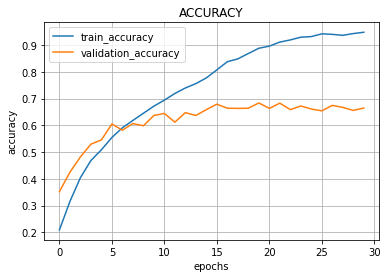

In [23]:
# Accuracy 시각화
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history["accuracy"],label="train_accuracy")
plt.plot(result.history["val_accuracy"],label="validation_accuracy")
plt.legend(loc="best")

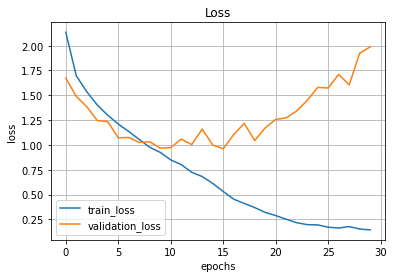

In [24]:
# Loss 시각화 

plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

## 오답노트

In [25]:
ret_val=model.predict(X_test.reshape(-1,32,32,3))
print(type(ret_val),ret_val.shape)

52/52 [==============================] - 2s 7ms/step
<class 'numpy.ndarray'> (1655, 128)


In [26]:
pred_val=np.argmax(ret_val, axis=1)

In [27]:
pred_label_comp_val =np.equal(pred_val, y_test)

In [33]:
index_label_pred_list=[[idx, y_test[idx], pred_val[idx]]
for idx, result in enumerate(pred_label_comp_val) if result==False]

len(index_label_pred_list)

576

In [40]:
random_false=np.random.randint(len(index_label_pred_list))

print(random_false)

320


In [41]:
mnist_index=index_label_pred_list[random_false][0]
label= index_label_pred_list[random_false][1]
pred=index_label_pred_list[random_false][2]

title = "index= "+str(mnist_index)+", label="+str(label)+ \
", predict= "+str(pred)

title

'index= 922, label=3.0, predict= 0'

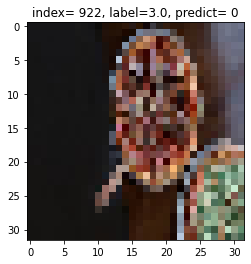

In [42]:
plt.title(title)
plt.imshow(X_test[mnist_index])